In [1]:
from AnastrisTNG import TNGsimulation,TNGtools,Anatools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
import gal1d

### 载入需要拟合的数据

In [3]:
BATHPATH='/home/dumin/IllustrisTNG/TNG50-1/output/'
snap99=TNGsimulation.Snapshot(BasePath=BATHPATH,Snap=99)

In [4]:
sub= snap99.load_particle(547293)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

In [5]:
bins = sub.r(np.linspace(0.01,0.99,100,),calfor='dm',calpa='mass')
pr = TNGtools.Profile(sub.dm,ndim=3,bins=bins)
rdm = pr['rbins'][pr['density']>0]
rhodm = pr['density'][pr['density']>0]

In [6]:
sub.R_vir(200)

SimArray(201.55088543, 'kpc')

### 拟合profile，有些profile参数过多，需要将BOUND范围设置小一些

In [7]:

gal1d.DoublePowerLawProfile.BOUND['alpha']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['beta']=[0,10]
gal1d.DoublePowerLawProfile.BOUND['gamma']=[0,5]
dou,jic = gal1d.DoublePowerLawProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in dou.keys():
    print(i,dou[i])
print('AIC',dou.AIC(rdm,rhodm,))
dou.formular()

rho_s 7856.430067182528
r_s 240.17727514553846
alpha 2.0471157970521867
beta 9.467404860813193
gamma 2.221642272763567
AIC 11.395825061090914


In [8]:
nfw,jic = gal1d.NFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in nfw.keys():
    print(i,nfw[i])
print('AIC',nfw.AIC(rdm,rhodm,))
nfw.formular()

r_s 12.807460818489933
rho_s 14961725.552925995
AIC 9.505267965158549


In [9]:
gnfw,jic = gal1d.GNFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in gnfw.keys():
    print(i,gnfw[i])
print('AIC',gnfw.AIC(rdm,rhodm,))
gnfw.formular()

rho_s 27377044.36922832
r_s 10.404627117512879
gamma 0.723287901713214
AIC 11.589251777504085


In [10]:
ein,jic = gal1d.EinastoProfile.fit(rdm,rhodm,use_analytical_jac=False)
for i in ein.keys():
    print(i,ein[i])
print('AIC',ein.AIC(rdm,rhodm,))
ein.formular()

rho_s 1781404.4365093932
r_s 18.341643322695194
n 3.989450404671157
AIC 8.658699337462458


### 半径以内的所有质量

In [11]:
np.log10(gnfw.enclosed_mass(200))

11.868206538140612

In [12]:
np.log10(gnfw.Integrate(200))

11.864250869405447

In [13]:
np.log10(nfw.enclosed_mass([200,100]))

array([11.86854841, 11.70689705])

In [14]:
np.log10(nfw.Integrate([200,100]))

array([11.86372255, 11.69987731])

In [15]:
np.log10(sub.dm['mass'].sum())

SimArray(11.90492599, 'Msol')

In [16]:
np.log10(ein.enclosed_mass(200))

11.873622782740666

In [17]:
np.log10(ein.total_mass())

11.979221911329562

Text(0, 0.5, 'log($|\\delta(\\rho)/\\rho|$)')

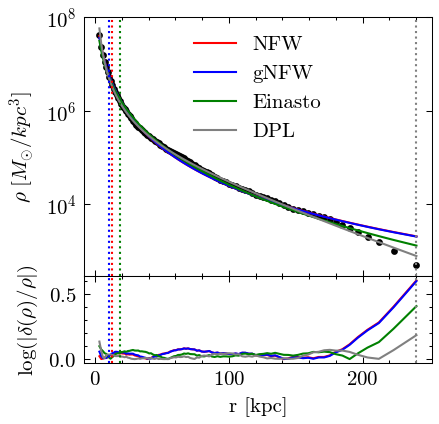

In [18]:
fig,axis = plt.subplots(2,1,dpi=150,height_ratios=[3,1],sharex=True,figsize=(3,3))
axis[0].scatter(rdm,rhodm,c='k',s=5)
axis[0].plot(rdm,nfw(rdm),c='r',label='NFW')
axis[0].plot(rdm,gnfw(rdm),c='b',label='gNFW')
axis[0].plot(rdm,ein(rdm),c='g',label='Einasto')
axis[0].plot(rdm,dou(rdm),c='grey',label='DPL')
#plt.plot(rdm,ein(rdm),c='y')
axis[0].set_yscale('log')
axis[1].plot(rdm, np.log10(np.abs((nfw(rdm)-rhodm)/rhodm)+1),c='r')
axis[1].plot(rdm, np.log10(np.abs((gnfw(rdm)-rhodm)/rhodm)+1),c='b')
axis[1].plot(rdm, np.log10(np.abs((ein(rdm)-rhodm)/rhodm)+1),c='g')
axis[1].plot(rdm,np.log10(np.abs((dou(rdm)-rhodm)/rhodm)+1),c='grey')

axis[0].axvline(gnfw['r_s'],c='b',linestyle=':')
axis[0].axvline(nfw['r_s'],c='r',linestyle=':')
axis[0].axvline(ein['r_s'],c='g',linestyle=':')
axis[0].axvline(dou['r_s'],c='grey',linestyle=':')
axis[1].axvline(gnfw['r_s'],c='b',linestyle=':')
axis[1].axvline(nfw['r_s'],c='r',linestyle=':')
axis[1].axvline(ein['r_s'],c='g',linestyle=':')
axis[1].axvline(dou['r_s'],c='grey',linestyle=':')
axis[0].legend(loc='best')
fig.subplots_adjust(hspace=0)
axis[1].set_xlabel('r [kpc]')
axis[0].set_ylabel(r'$\rho\ [M_{\odot}/kpc^{3}]$')
axis[1].set_ylabel(r'log($|\delta(\rho)/\rho|$)')

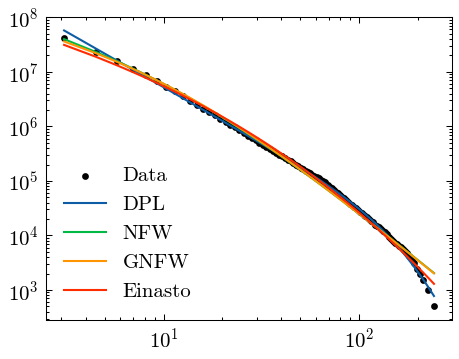

In [19]:
plt.figure(dpi=150)
plt.scatter(rdm,rhodm,label='Data',c='k',s=5)
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')
plt.xscale('log')

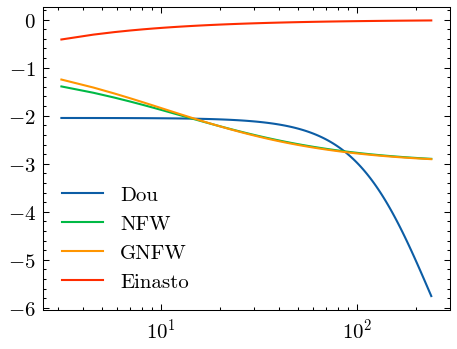

In [20]:
plt.figure(dpi=150)
plt.plot(rdm,dou.logarithmic_slope(rdm),label='Dou')
plt.plot(rdm,nfw.logarithmic_slope(rdm),label='NFW')
plt.plot(rdm,gnfw.logarithmic_slope(rdm),label='GNFW')
plt.plot(rdm,ein.logarithmic_slope(rdm),label='Einasto')
plt.legend()
#plt.yscale('log')
plt.xscale('log')

In [22]:
bins = sub.R(np.linspace(0.01,0.99,200),calfor='star',calpa='mass')
pR = TNGtools.Profile(sub.s,ndim=2,bins=bins)
Rstar = pR['rbins'][pR['density']>0]
denstar = pR['density'][pR['density']>0]

### 拟合以及表达式

In [23]:
#gal1d.SersicProfile.BOUND['n']=[0.2,20]

ser,jic =gal1d.SersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in ser.keys():
    print(i,ser[i])
ser.formular()

n 6.590934327205885
r_e 2.2496404199951026
I_e 531128376.04197514


In [24]:
#gal1d.CoreSersicProfile.BOUND['n']=[0.2,20]

cor,jic =gal1d.CoreSersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in cor.keys():
    print(i,cor[i])
cor.formular()

I_b 4942824840.510641
r_b 3.8552116862429906
r_e 7.209998855299429
n 2.2186625011623526
alpha 1.0995757094869483
gamma 1.2413635173069615


In [25]:
exp,jic =gal1d.ExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in exp.keys():
    print(i,exp[i])
exp.formular()

h 3.3366760975889447
I_0 924839547.6814244


In [26]:
bexp,jic =gal1d.BrokenExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in bexp.keys():
    print(i,bexp[i])
#bexp.formular()

I_0 7240284926.246045
h1 0.49373078203584586
h2 4.819126537813518
r_b 1.7101258731139088
alpha 1.3403363867178022


### 所有质量

In [27]:
np.log10(ser.total_mass())

10.890243512333983

In [28]:
np.log10(exp.total_mass())

10.810874361527294

In [29]:
np.log10(sub.s['mass'].sum())

SimArray(10.73447012, 'Msol')

In [30]:
np.log10(bexp.enclosed_mass(20))

10.709416040868994

In [31]:
np.log10(cor.enclosed_mass(20))

10.745900955887736

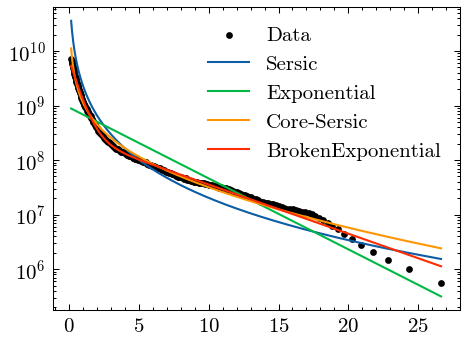

In [32]:

plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,ser(Rstar),label='Sersic')
plt.plot(Rstar,exp(Rstar),label='Exponential')
plt.plot(Rstar,cor(Rstar),label='Core-Sersic')
plt.plot(Rstar,bexp(Rstar),label='BrokenExponential')
plt.legend()
plt.yscale('log')

## 拟合多成分的曲线，用MultiProfiles，add_profile

In [33]:
Ser_Exp = gal1d.MultiProfiles(ndim=2)
gal1d.SersicProfile.BOUND['n'] = [0,8]
Ser_Exp.add_profile(gal1d.SersicProfile)
Ser_Exp.add_profile(gal1d.ExponentialProfile)
Ser_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [34]:
Ser_Exp

<||SersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

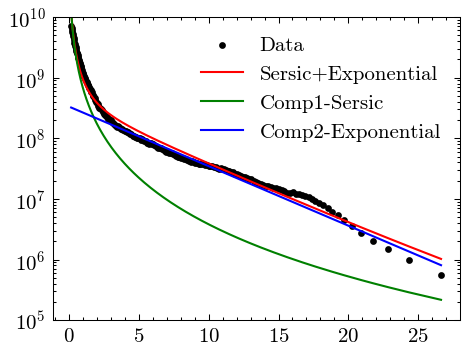

In [36]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Ser_Exp(Rstar),label='Sersic+Exponential',c='r')
plt.plot(Rstar,Ser_Exp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

### 半径以内的质量，以及各个成分的质量占比

In [35]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

In [36]:
np.log10(Ser_Exp.enclosed_mass(20))

10.52561828005214

In [37]:
np.array(Ser_Exp.components_enclosed_mass(20))/Ser_Exp.enclosed_mass(20)

array([0.38127623, 0.61872377])

In [38]:
Dou_Exp = gal1d.MultiProfiles()
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

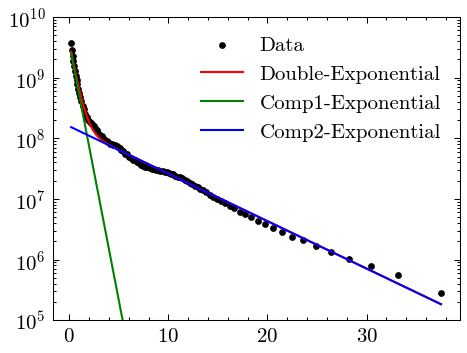

In [39]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Exp(Rstar),label='Double-Exponential',c='r')
plt.plot(Rstar,Dou_Exp['c1']*Dou_Exp['p1'](Rstar),label='Comp1-Exponential',c='g')
plt.plot(Rstar,Dou_Exp['c2']*Dou_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [40]:
np.array(Dou_Exp.components_enclosed_mass(20))/Dou_Exp.enclosed_mass(20)

array([0.18556879, 0.81443121])

In [41]:
gal1d.SersicProfile.BOUND

{'n': [0, 8], 'r_e': None, 'I_e': None}

In [56]:
Ser_BExp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n']=[2,10]
Ser_BExp.add_profile(gal1d.SersicProfile)
gal1d.BrokenExponentialProfile.BOUND['alpha']=[0,10]
Ser_BExp.add_profile(gal1d.BrokenExponentialProfile)
Ser_BExp.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

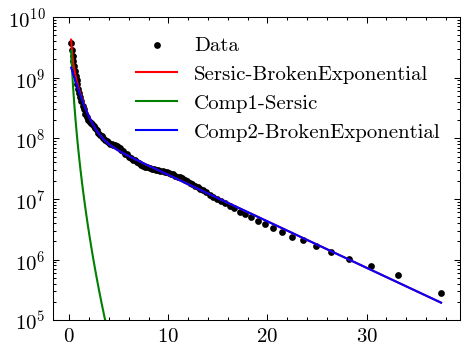

In [57]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Ser_BExp(Rstar),label='Sersic-BrokenExponential',c='r')
plt.plot(Rstar,Ser_BExp['c1']*Ser_BExp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_BExp['c2']*Ser_BExp['p2'](Rstar),label='Comp2-BrokenExponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [58]:
np.array(Ser_BExp.components_enclosed_mass(20))/Ser_BExp.enclosed_mass(20)

array([0.05651841, 0.94348159])

In [46]:
Dou_Ser = gal1d.MultiProfiles()
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

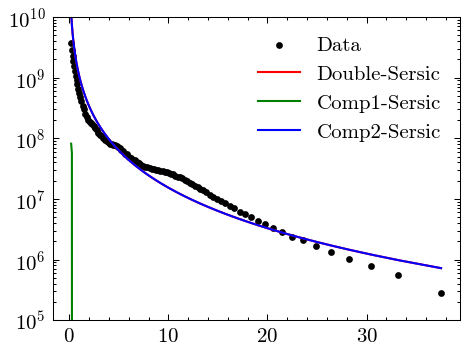

In [67]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Ser(Rstar),label='Double-Sersic',c='r')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[0],label='Comp1-Sersic',c='g')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[1],label='Comp2-Sersic',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [59]:
print(Dou_Ser['p2'])
for i in Dou_Ser['p2'].keys():
    print(i, Dou_Ser['p2'][i])

<SersicProfile['n', 'r_e', 'I_e']>
n 7.999999999358103
r_e 5.172525967009542
I_e 58964181.7593591


In [50]:
CorSer_Exp = gal1d.MultiProfiles()
CorSer_Exp.add_profile(gal1d.CoreSersicProfile)
CorSer_Exp.add_profile(gal1d.ExponentialProfile)
CorSer_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [51]:
CorSer_Exp

<||CoreSersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

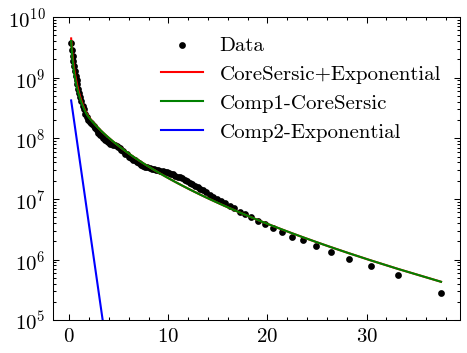

In [66]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,CorSer_Exp(Rstar.view(np.ndarray)),label='CoreSersic+Exponential',c='r')
plt.plot(Rstar,CorSer_Exp['c1']*CorSer_Exp['p1'](Rstar),label='Comp1-CoreSersic',c='g')
plt.plot(Rstar,CorSer_Exp['c2']*CorSer_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [56]:
CorSer_Exp['p1']

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>

In [57]:
print(CorSer_Exp['p1'])
for i in CorSer_Exp['p1'].keys():
    print(i, CorSer_Exp['p1'][i])

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>
I_b 1339436846.418265
r_b 1.7972007728632624
r_e 7.743303260592182
n 1.967557369009247
alpha 19.348731733066654
gamma 1.2680686913203967


In [58]:
print(CorSer_Exp['p2'])
for i in CorSer_Exp['p2'].keys():
    print(i, CorSer_Exp['p2'][i])

<ExponentialProfile['h', 'I_0']>
h 0.3812580103923744
I_0 702997789.8080705
